# Initialization

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
data = pd.read_csv('./data/train.csv')

# Preliminary Analysis

In [6]:
display(data.head(5))

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0005019281,ADZPIG9QOCDG5,0,0,4.0,1203984000,good version of a classic,This is a charming version of the classic Dick...
1,1,0005019281,A35947ZP82G7JH,0,0,3.0,1388361600,Good but not as moving,It was good but not as emotionally moving as t...
2,2,0005019281,A3UORV8A9D5L2E,0,0,3.0,1388361600,Winkler's Performance was ok at best!,"Don't get me wrong, Winkler is a wonderful cha..."
3,3,0005019281,A1VKW06X1O2X7V,0,0,5.0,1202860800,It's an enjoyable twist on the classic story,Henry Winkler is very good in this twist on th...
4,4,0005019281,A3R27T4HADWFFJ,0,0,4.0,1387670400,Best Scrooge yet,This is one of the best Scrooge movies out. H...


In [3]:
display(data.describe())

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,1.697533e+06,1.697533e+06,1.697533e+06,1.397533e+06,1.697533e+06
mean,8.487660e+05,3.569048e+00,5.301422e+00,4.111468e+00,1.262422e+09
std,4.900357e+05,1.727883e+01,2.024445e+01,1.196808e+00,1.289277e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.793792e+08
25%,4.243830e+05,0.000000e+00,0.000000e+00,4.000000e+00,1.164413e+09
50%,8.487660e+05,1.000000e+00,1.000000e+00,5.000000e+00,1.307491e+09
75%,1.273149e+06,3.000000e+00,5.000000e+00,5.000000e+00,1.373242e+09
max,1.697532e+06,6.084000e+03,6.510000e+03,5.000000e+00,1.406074e+09


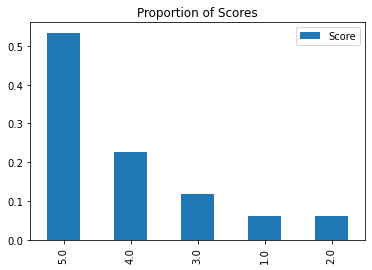

In [13]:
data['Score'].value_counts(normalize=True).plot(kind='bar', legend=True)
plt.title("Proportion of Scores")
plt.show()

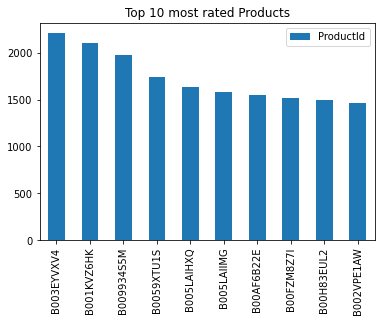

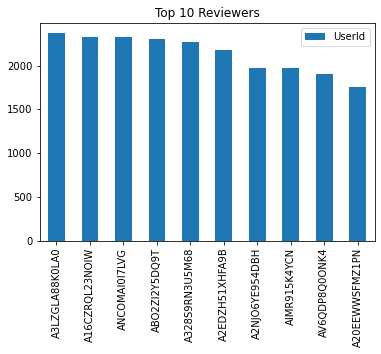

In [20]:
plt.figure(1)
data['ProductId'].value_counts().nlargest(10).plot(kind='bar', legend=True)
plt.title("Top 10 most rated Products")
plt.show()

plt.figure(2)
data['UserId'].value_counts().nlargest(10).plot(kind='bar', legend=True)
plt.title("Top 10 Reviewers")
plt.show()

<Figure size 432x288 with 0 Axes>

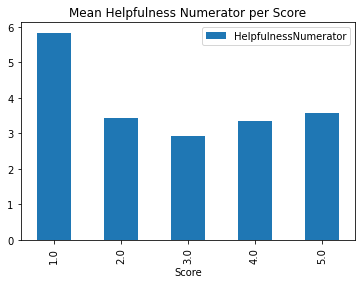

<Figure size 432x288 with 0 Axes>

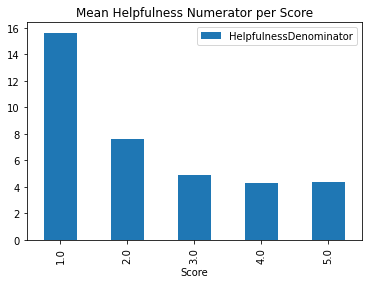

In [23]:
plt.figure(1)
data[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

plt.figure(2)
data[['Score', 'HelpfulnessDenominator']].groupby('Score').mean().plot(kind='bar', legend=True)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

<BarContainer object of 3 artists>

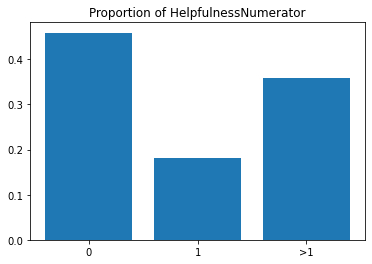

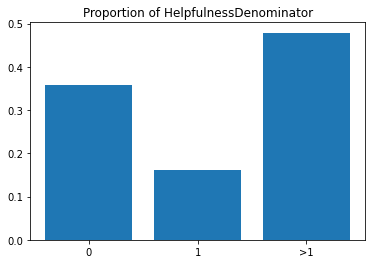

In [40]:
plt.figure(1)
HN0 = data[data['HelpfulnessNumerator'] == 0]['HelpfulnessNumerator'].value_counts().item()
HN1 = data[data['HelpfulnessNumerator'] == 1]['HelpfulnessNumerator'].value_counts().item()
HN2 = data[data['HelpfulnessNumerator'] > 1]['HelpfulnessNumerator'].value_counts().sum()
HNall = HN0+HN1+HN2
x1 = ['0','1','>1']
y1 = [HN0,HN1,HN2]/HNall
plt.title("Proportion of HelpfulnessNumerator")
plt.bar(x1,y1)

plt.figure(2)
HD0 = data[data['HelpfulnessDenominator'] == 0]['HelpfulnessDenominator'].value_counts().item()
HD1 = data[data['HelpfulnessDenominator'] == 1]['HelpfulnessDenominator'].value_counts().item()
HD2 = data[data['HelpfulnessDenominator'] > 1]['HelpfulnessDenominator'].value_counts().sum()
HDall = HD0+HD1+HD2
x2 = ['0','1','>1']
y2 = [HD0,HD1,HD2]/HDall
plt.title("Proportion of HelpfulnessDenominator")
plt.bar(x2,y2)

<Figure size 432x288 with 0 Axes>

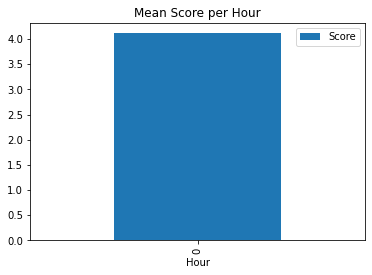

<Figure size 432x288 with 0 Axes>

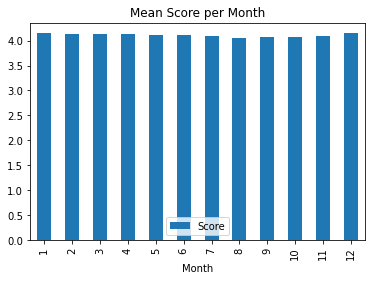

<Figure size 432x288 with 0 Axes>

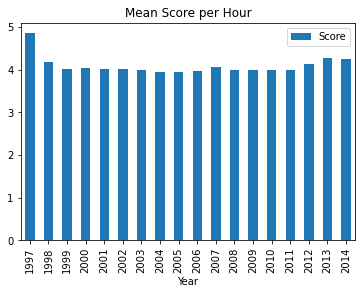

In [42]:
data['Date'] = pd.to_datetime(data['Time'], unit='s')
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Hour'] = data['Date'].dt.hour

plt.figure(1)
data[['Score', 'Hour']].groupby('Hour').mean().plot(kind='bar', legend=True)
plt.title("Mean Score per Hour")
plt.show()

plt.figure(2)
data[['Score', 'Month']].groupby('Month').mean().plot(kind='bar', legend=True)
plt.title("Mean Score per Month")
plt.show()

plt.figure(3)
data[['Score', 'Year']].groupby('Year').mean().plot(kind='bar', legend=True)
plt.title("Mean Score per Hour")
plt.show()

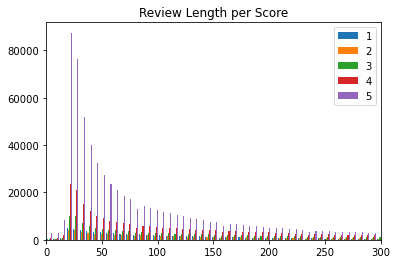

In [46]:
data['ReviewLength'] = data.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)
colors = ['r', 'b', 'g', 'c', 'm', 'y', 'k', 'darkorange', 'indigo', 'pink', 'grey']
fig, ax = plt.subplots()
reviews = []
for i in range(1, 6):
    score = data.where(data['Score'] == float(i))
    reviews.append(score['ReviewLength'].dropna())

plt.hist(reviews, bins=1000, label=list(range(1, 6)))
ax.legend(loc='upper right')
plt.xlim(0, 300)
plt.title("Review Length per Score")
plt.show()  

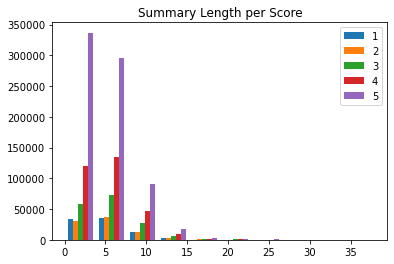

In [48]:
data['SummaryLength'] = data.apply(lambda row : len(row['Summary'].split()) if type(row['Summary']) == str else 0, axis = 1)
fig, ax = plt.subplots()
reviews = []
for i in range(1, 6):
    score = data.where(data['Score'] == float(i))
    reviews.append(score['SummaryLength'].dropna())

plt.hist(reviews, bins=10, label=list(range(1, 6)))
ax.legend(loc='upper right')
plt.title("Summary Length per Score")
plt.show()

# Data Preprocess

In [7]:
X_test = data[data.isnull().Score]
X_test_review = X_test['Text'].fillna(X_test['Summary'])

data.dropna(inplace=True)

data1 = data.sample(frac=0.4, replace=True, random_state=1)
X_train_review = data1['Text']
y_train_all = data1['Score']

vectorizer = TfidfVectorizer(max_df=0.9, ngram_range = (1, 2)).fit(X_train_review)
X_train_vectorized = vectorizer.transform(X_train_review)


X_train, X_val, y_train, y_val = train_test_split(X_train_vectorized, y_train_all, test_size=0.2, random_state=1)

In [6]:
# xticks,yticks
old = [0.5,1.5,2.5,3.5,4.5]
new = [1,2,3,4,5]

# Model Selection

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6705904451818921


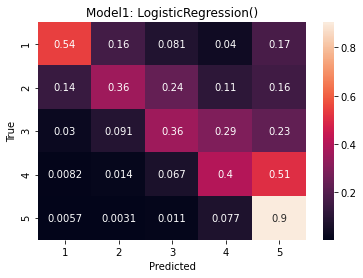

In [16]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1_prediction = model1.predict(X_val)
model1_acc = accuracy_score(y_val, model1_prediction)
print(model1_acc)

cm1 = confusion_matrix(y_val, model1_prediction, normalize='true')
sns.heatmap(cm1, annot=True)
plt.title('Model1: LogisticRegression()')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(old, new)
plt.yticks(old, new)
plt.show()

0.7422918325178672


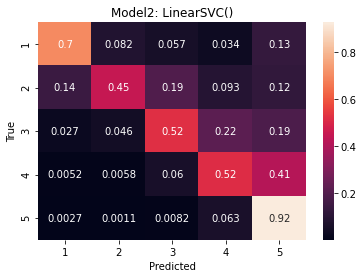

In [15]:
model2 = LinearSVC()
model2.fit(X_train, y_train)
model2_prediction = model2.predict(X_val)
model2_acc = accuracy_score(y_val, model2_prediction)
print(model2_acc)

cm2 = confusion_matrix(y_val, model2_prediction, normalize='true')
sns.heatmap(cm2, annot=True)
plt.title('Model2: LinearSVC()')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(old, new)
plt.yticks(old, new)
plt.show()

0.5373400001788957


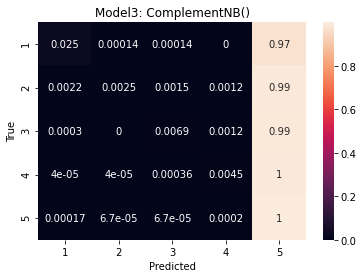

In [14]:
model3 = ComplementNB()
model3.fit(X_train, y_train)
model3_prediction = model3.predict(X_val)
model3_acc = accuracy_score(y_val, model3_prediction)
print(model3_acc)

cm3 = confusion_matrix(y_val, model3_prediction, normalize='true')
sns.heatmap(cm3, annot=True)
plt.title('Model3: ComplementNB()')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(old, new)
plt.yticks(old, new)
plt.show()

0.5544513716826033


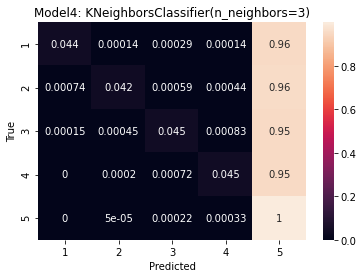

In [7]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train, y_train)
model4_prediction = model4.predict(X_val)
model4_acc = accuracy_score(y_val, model4_prediction)
print(model4_acc)

cm4 = confusion_matrix(y_val, model4_prediction, normalize='true')
sns.heatmap(cm4, annot=True)
plt.title('Model4: KNeighborsClassifier(n_neighbors=3)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(old, new)
plt.yticks(old, new)
plt.show()

0.5717416388632969


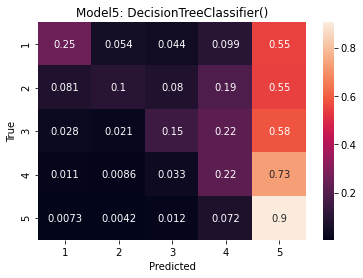

In [8]:
model5 = DecisionTreeClassifier(max_depth = 20)
model5.fit(X_train, y_train)
model5_prediction = model5.predict(X_val)
model5_acc = accuracy_score(y_val, model5_prediction)
print(model5_acc)

cm5 = confusion_matrix(y_val, model5_prediction, normalize='true')
sns.heatmap(cm5, annot=True)
plt.title('Model5: DecisionTreeClassifier()')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(old, new)
plt.yticks(old, new)
plt.show()

0.7061191266313049


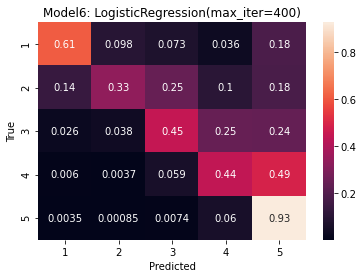

In [8]:
model6 = LogisticRegression(max_iter=400)
model6.fit(X_train, y_train)
model6_prediction = model6.predict(X_val)
model6_acc = accuracy_score(y_val, model6_prediction)
print(model6_acc)

cm6 = confusion_matrix(y_val, model6_prediction, normalize='true')
sns.heatmap(cm6, annot=True)
plt.title('Model6: LogisticRegression(max_iter=400)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(old, new)
plt.yticks(old, new)
plt.show()

0.7061370161990036


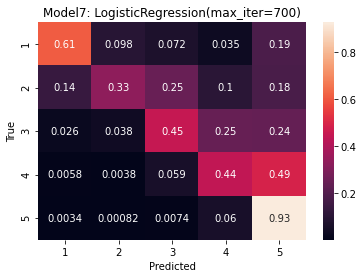

In [26]:
model7 = LogisticRegression(max_iter=700)
model7.fit(X_train, y_train)
model7_prediction = model7.predict(X_val)
model7_acc = accuracy_score(y_val, model7_prediction)
print(model7_acc)

cm7 = confusion_matrix(y_val, model7_prediction, normalize='true')
sns.heatmap(cm7, annot=True)
plt.title('Model7: LogisticRegression(max_iter=700)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(old, new)
plt.yticks(old, new)
plt.show()

# Prediction

In [28]:
model2.fit(X_train_vectorized, y_train_all)
prediction1 = pd.read_csv('./data/test.csv')
prediction1['Score'] = model2.predict(vectorizer.transform(X_test_review))
prediction1.to_csv("./data/submission_model2.csv", index=False)

model6.fit(X_train_vectorized, y_train_all)
prediction6 = pd.read_csv('./data/test.csv')
prediction['Score'] = model6.predict(vectorizer.transform(X_test_review))
prediction.to_csv("./data/submission_model6.csv", index=False)